In [46]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [47]:
s = os.listdir()
s.sort()
info = {}
for file in s:
    if '32KB_8way.pickle' in file:
        with open(file,'rb') as f:
            print(file.split('_')[0])
            info[file.split('_')[0]] = pickle.load(f)

FIFO
LFU
LIFO
LRFU
LRU2
LRU
MFU
MRU
PLRU
R


In [48]:
print(info.keys())

dict_keys(['FIFO', 'LFU', 'LIFO', 'LRFU', 'LRU2', 'LRU', 'MFU', 'MRU', 'PLRU', 'R'])


In [49]:
traces = []
for k in info['R']:
    a = info['R'][k]
    if type(a)==type({}):
        traces.append(k)

In [50]:
hitRates = {}
for alg in info:
    print(alg)
    hitRates[alg] = []
    for k in traces:
        a = info[alg][k]
        if type(a)==type({}):
            hits = info[alg][k]['hits']
            miss = info[alg][k]['miss']
            hitRates[alg].append(hits/(hits+miss))

FIFO
LFU
LIFO
LRFU
LRU2
LRU
MFU
MRU
PLRU
R


In [51]:
for alg in hitRates:
    print(alg, np.mean(hitRates[alg]))

FIFO 0.7218633883441739
LFU 0.7302526843139476
LIFO 0.7697673054542934
LRFU 0.7677601451684916
LRU2 0.7691887207255365
LRU 0.7697673054542934
MFU 0.758637140340213
MRU 0.7218633883441739
PLRU 0.7650510252384278
R 0.764183184294232


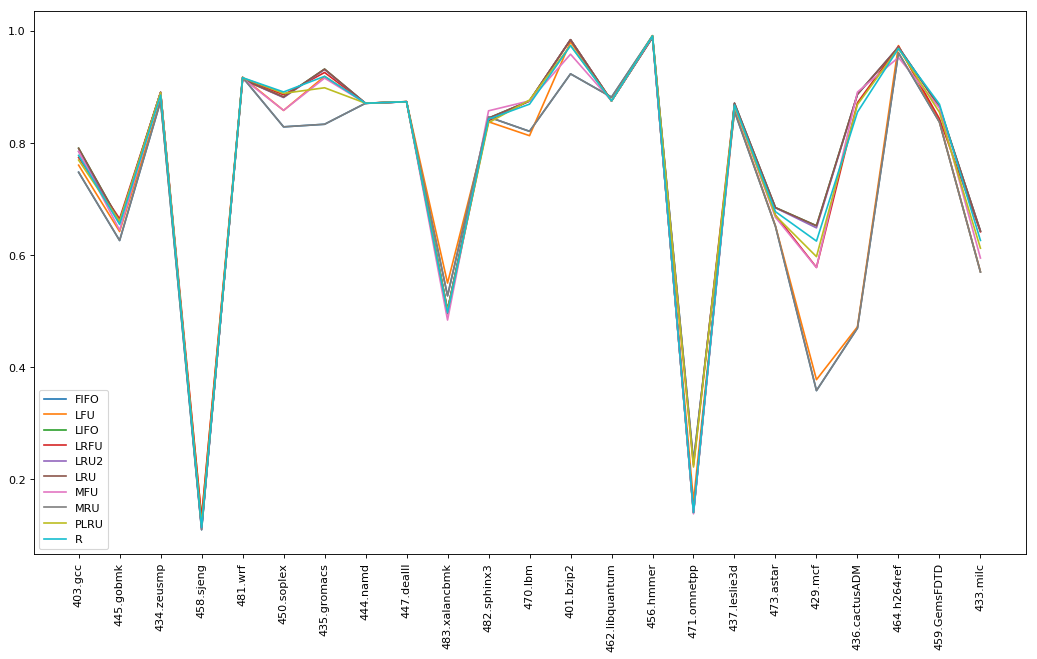

In [52]:
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
for alg in hitRates:
    plt.plot(hitRates[alg],label=alg)
plt.legend()
plt.xticks(range(len(traces)), traces, rotation='vertical')
plt.show()

[0.3577701312557456, 0.3772660357958793, 0.6520442092930241, 0.5777351447310284, 0.648269860598357, 0.6520442092930241, 0.5773586718208489, 0.3577701312557456, 0.5969158930856199, 0.6246597150820558]


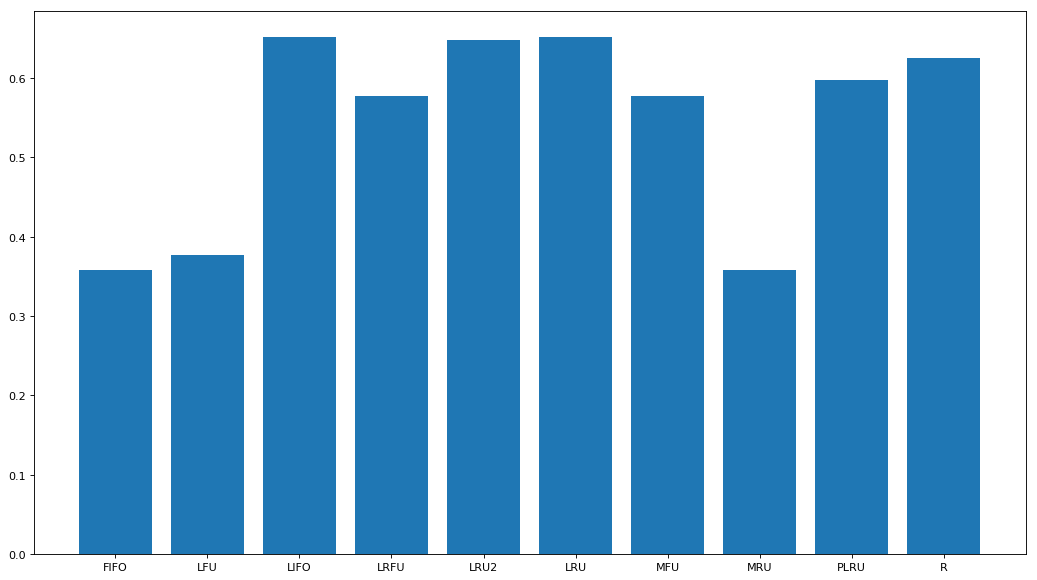

In [53]:
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][18] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
print([hitRates[alg][18] for alg in hitRates])
#plt.ylim(.7,.8)
plt.show()

In [57]:
setCache = info['R']['setCacheTotal']
wayCache = info['R']['wayCacheTotal']

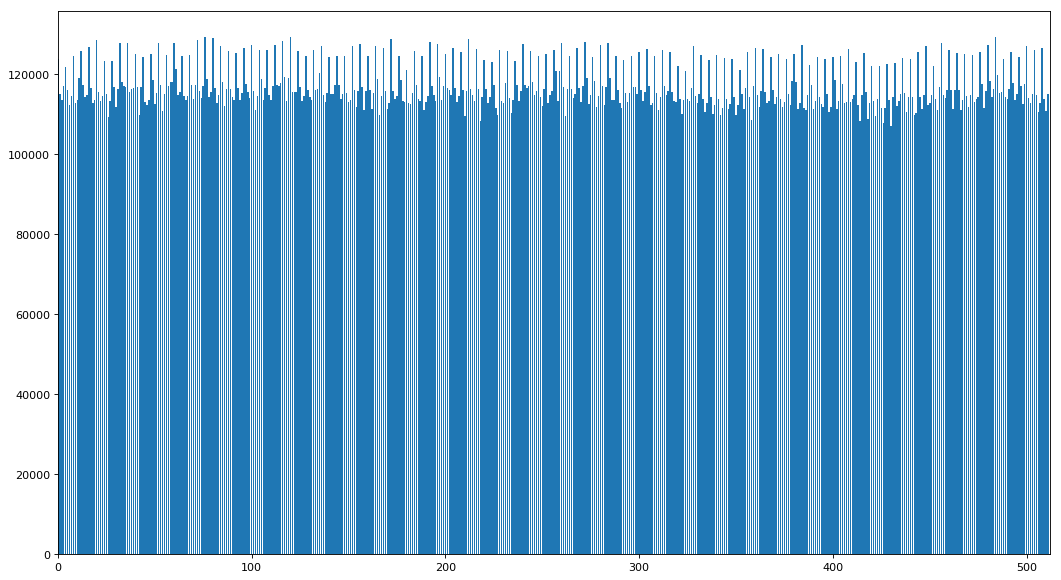

512 8


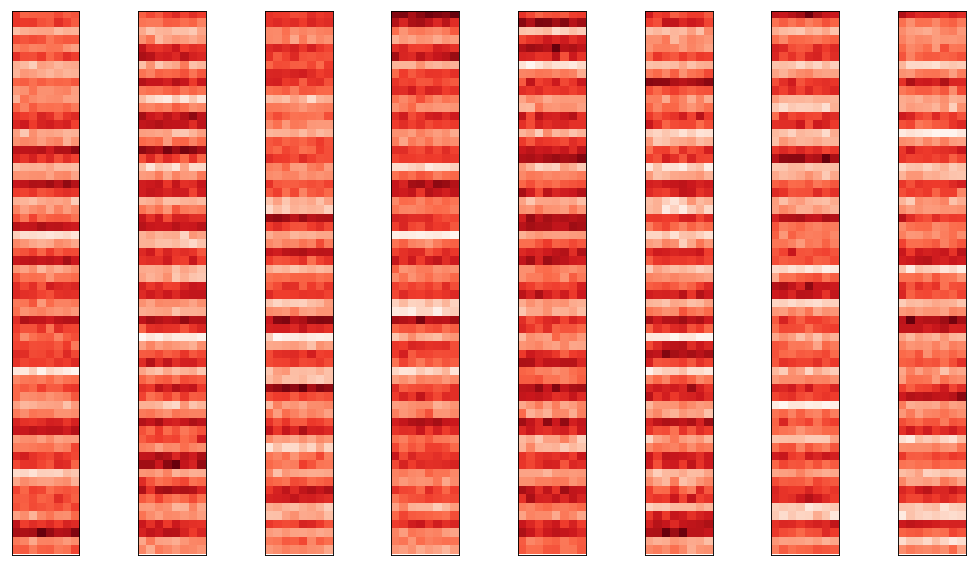

In [58]:
setSize = len(setCache)
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,setSize)
plt.bar(range(setSize), setCache)
plt.show()

print(len(wayCache), len(wayCache[0]))
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
for i in range(setSize // 64):
    plt.subplot(1, setSize // 64, i + 1)
    plt.imshow(wayCache[i * 64:(i + 1) * 64], cmap='Reds', interpolation='nearest')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()